# Churn Prediction

**Problem Statement: Use ANN model to predict if the customer will leave the bank**

**Importing Libraries**

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reading Data**

In [44]:
df = pd.read_csv('Churn_Modelling.csv')

In [45]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df.shape

(10000, 14)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [48]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


# EDA

<AxesSubplot:xlabel='Exited', ylabel='count'>

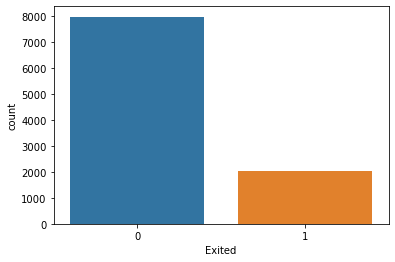

In [49]:
sns.countplot(x='Exited',data=df)

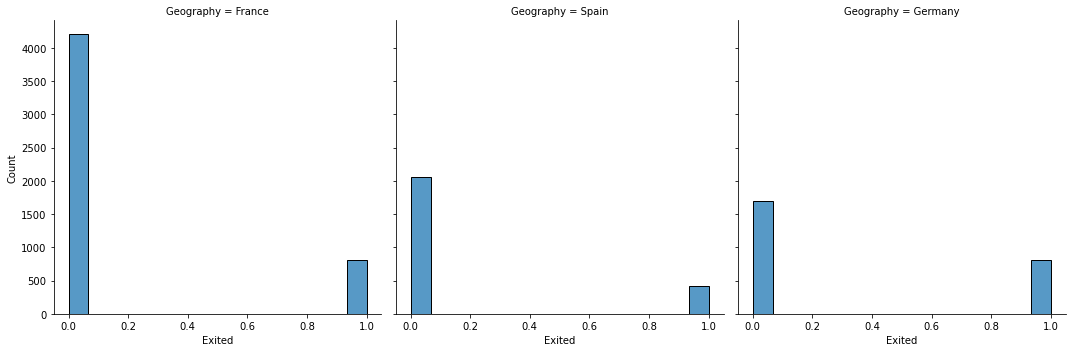

In [50]:
sns.displot(data=df,x='Exited',col='Geography')

In [51]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

**Label Encoding**

In [52]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['Geography', 'Gender'], dtype='object')


In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objList:
    df[feature] = le.fit_transform(df[feature].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB
None


In [54]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


# Train Test Split

In [55]:
X = df.drop('Exited',axis=1).values
y = df['Exited'].values

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=31)

# Scaling Data

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [60]:
model = Sequential()


model.add(Dense(units=12,activation='relu'))  #input

model.add(Dense(units=7,activation='relu'))  #hidden


model.add(Dense(units=1,activation='sigmoid'))   #output

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

# Training the Model

In [61]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/500
250/250 [==============================] - 2s 3ms/step - loss: 0.5762 - val_loss: 0.4997
Epoch 2/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4935 - val_loss: 0.4808
Epoch 3/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4925 - val_loss: 0.4655
Epoch 4/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4659 - val_loss: 0.4536
Epoch 5/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4468 - val_loss: 0.4454
Epoch 6/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4483 - val_loss: 0.4336
Epoch 7/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4405 - val_loss: 0.4285
Epoch 8/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4345 - val_loss: 0.4232
Epoch 9/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4277 - val_loss: 0.4127
Epoch 10/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4007 - val_lo

250/250 [==============================] - 1s 3ms/step - loss: 0.3320 - val_loss: 0.3558
Epoch 82/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3312 - val_loss: 0.3527
Epoch 83/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3396 - val_loss: 0.3546
Epoch 84/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3267 - val_loss: 0.3526
Epoch 85/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3463 - val_loss: 0.3520
Epoch 86/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3464 - val_loss: 0.3526
Epoch 87/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3515 - val_loss: 0.3516
Epoch 88/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3333 - val_loss: 0.3650
Epoch 89/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3347 - val_loss: 0.3523
Epoch 90/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3394 - val_loss: 

Epoch 161/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3149 - val_loss: 0.3448
Epoch 162/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3183 - val_loss: 0.3519
Epoch 163/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3241 - val_loss: 0.3448
Epoch 164/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3294 - val_loss: 0.3469
Epoch 165/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3189 - val_loss: 0.3452
Epoch 166/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3128 - val_loss: 0.3451
Epoch 167/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3215 - val_loss: 0.3461
Epoch 168/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3176 - val_loss: 0.3459
Epoch 169/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3239 - val_loss: 0.3483
Epoch 170/500
250/250 [==============================] - 1s 3ms/step - lo

250/250 [==============================] - 1s 2ms/step - loss: 0.3167 - val_loss: 0.3470
Epoch 241/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3235 - val_loss: 0.3439
Epoch 242/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3213 - val_loss: 0.3445
Epoch 243/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3173 - val_loss: 0.3446
Epoch 244/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3156 - val_loss: 0.3473
Epoch 245/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3202 - val_loss: 0.3476
Epoch 246/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3197 - val_loss: 0.3441
Epoch 247/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3214 - val_loss: 0.3426
Epoch 248/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3255 - val_loss: 0.3425
Epoch 249/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3198 - v

250/250 [==============================] - 1s 3ms/step - loss: 0.3186 - val_loss: 0.3431
Epoch 320/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3151 - val_loss: 0.3434
Epoch 321/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3203 - val_loss: 0.3458
Epoch 322/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3201 - val_loss: 0.3481
Epoch 323/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3302 - val_loss: 0.3435
Epoch 324/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3209 - val_loss: 0.3513
Epoch 325/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3232 - val_loss: 0.3475
Epoch 326/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3170 - val_loss: 0.3443
Epoch 327/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3148 - val_loss: 0.3502
Epoch 328/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3227 - v

250/250 [==============================] - 1s 2ms/step - loss: 0.3168 - val_loss: 0.3447
Epoch 399/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3138 - val_loss: 0.3495
Epoch 400/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3193 - val_loss: 0.3434
Epoch 401/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3114 - val_loss: 0.3433
Epoch 402/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3154 - val_loss: 0.3498
Epoch 403/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3255 - val_loss: 0.3461
Epoch 404/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3236 - val_loss: 0.3459
Epoch 405/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3054 - val_loss: 0.3438
Epoch 406/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3182 - val_loss: 0.3482
Epoch 407/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3297 - v

250/250 [==============================] - 1s 3ms/step - loss: 0.3218 - val_loss: 0.3474
Epoch 478/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3259 - val_loss: 0.3474
Epoch 479/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3167 - val_loss: 0.3449
Epoch 480/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3190 - val_loss: 0.3433
Epoch 481/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3148 - val_loss: 0.3447
Epoch 482/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3091 - val_loss: 0.3490
Epoch 483/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3239 - val_loss: 0.3465
Epoch 484/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3100 - val_loss: 0.3436
Epoch 485/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3152 - val_loss: 0.3452
Epoch 486/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3193 - v

In [62]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

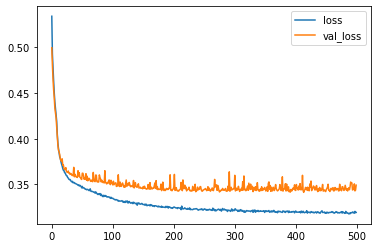

In [63]:
model_loss.plot()

In [64]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

C:\Users\Vaibhav\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.67      0.55      0.60       407

    accuracy                           0.85      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.84      0.85      0.85      2000

[[1483  110]
 [ 185  222]]


**The accuracy is coming out to be 0.85**

# By Early Stopping

In [65]:
model = Sequential()
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=7,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [68]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/500
250/250 [==============================] - 2s 3ms/step - loss: 0.6077 - val_loss: 0.4952
Epoch 2/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4960 - val_loss: 0.4681
Epoch 3/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4692 - val_loss: 0.4484
Epoch 4/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4547 - val_loss: 0.4341
Epoch 5/500
250/250 [==============================] - 1s 4ms/step - loss: 0.4393 - val_loss: 0.4247
Epoch 6/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4295 - val_loss: 0.4167
Epoch 7/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4198 - val_loss: 0.4115
Epoch 8/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4170 - val_loss: 0.4065
Epoch 9/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4067 - val_loss: 0.4009
Epoch 10/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4036 - val_lo

250/250 [==============================] - 1s 2ms/step - loss: 0.3426 - val_loss: 0.3538
Epoch 82/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3581 - val_loss: 0.3556
Epoch 83/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3347 - val_loss: 0.3540
Epoch 84/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3473 - val_loss: 0.3537
Epoch 85/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3468 - val_loss: 0.3532
Epoch 86/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3417 - val_loss: 0.3525
Epoch 87/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3317 - val_loss: 0.3578
Epoch 88/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3455 - val_loss: 0.3534
Epoch 89/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3426 - val_loss: 0.3529
Epoch 90/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3414 - val_loss: 

Epoch 161/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3304 - val_loss: 0.3474
Epoch 162/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3309 - val_loss: 0.3521
Epoch 163/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3253 - val_loss: 0.3489
Epoch 164/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3391 - val_loss: 0.3486
Epoch 165/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3375 - val_loss: 0.3587
Epoch 166/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3317 - val_loss: 0.3474
Epoch 167/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3253 - val_loss: 0.3482
Epoch 168/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3307 - val_loss: 0.3554
Epoch 169/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3352 - val_loss: 0.3471
Epoch 170/500
250/250 [==============================] - 1s 3ms/step - lo

<AxesSubplot:>

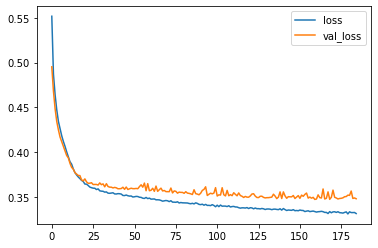

In [69]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [70]:
predictions1 = model.predict_classes(X_test)
print(classification_report(y_test,predictions1))
print(confusion_matrix(y_test,predictions1))

C:\Users\Vaibhav\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1593
           1       0.71      0.41      0.52       407

    accuracy                           0.85      2000
   macro avg       0.79      0.68      0.71      2000
weighted avg       0.83      0.85      0.83      2000

[[1523   70]
 [ 239  168]]


**The accuracy is coming out ot be 0.85**

# Adding in DropOut Layers

In [71]:
from tensorflow.keras.layers import Dropout

In [72]:
model = Sequential()
model.add(Dense(units=12,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=7,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [73]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/500
250/250 [==============================] - 2s 5ms/step - loss: 0.6981 - val_loss: 0.5037
Epoch 2/500
250/250 [==============================] - 1s 4ms/step - loss: 0.5361 - val_loss: 0.4942
Epoch 3/500
250/250 [==============================] - 1s 2ms/step - loss: 0.5251 - val_loss: 0.4864
Epoch 4/500
250/250 [==============================] - 1s 2ms/step - loss: 0.5071 - val_loss: 0.4758
Epoch 5/500
250/250 [==============================] - 1s 2ms/step - loss: 0.5057 - val_loss: 0.4714
Epoch 6/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4988 - val_loss: 0.4669
Epoch 7/500
250/250 [==============================] - 1s 4ms/step - loss: 0.4936 - val_loss: 0.4643
Epoch 8/500
250/250 [==============================] - 1s 4ms/step - loss: 0.4796 - val_loss: 0.4622
Epoch 9/500
250/250 [==============================] - 1s 4ms/step - loss: 0.4763 - val_loss: 0.4597
Epoch 10/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4796 - val_lo

250/250 [==============================] - 1s 4ms/step - loss: 0.4356 - val_loss: 0.4089
Epoch 82/500
250/250 [==============================] - 1s 4ms/step - loss: 0.4312 - val_loss: 0.4069
Epoch 83/500
250/250 [==============================] - 1s 4ms/step - loss: 0.4310 - val_loss: 0.4087
Epoch 84/500
250/250 [==============================] - 1s 4ms/step - loss: 0.4297 - val_loss: 0.4060
Epoch 85/500
250/250 [==============================] - 1s 4ms/step - loss: 0.4424 - val_loss: 0.4071
Epoch 86/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4384 - val_loss: 0.4075
Epoch 87/500
250/250 [==============================] - 1s 4ms/step - loss: 0.4366 - val_loss: 0.4076
Epoch 88/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4363 - val_loss: 0.4076
Epoch 89/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4252 - val_loss: 0.4063
Epoch 90/500
250/250 [==============================] - 1s 4ms/step - loss: 0.4366 - val_loss: 

Epoch 161/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4295 - val_loss: 0.4050
Epoch 00161: early stopping


<AxesSubplot:>

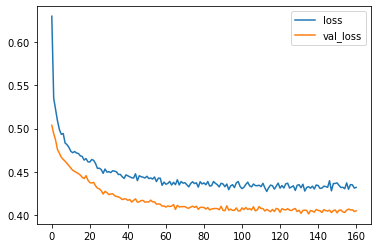

In [74]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [75]:
predictions2 = model.predict_classes(X_test)
print(classification_report(y_test,predictions2))
print(confusion_matrix(y_test,predictions2))

C:\Users\Vaibhav\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1593
           1       0.95      0.14      0.25       407

    accuracy                           0.82      2000
   macro avg       0.89      0.57      0.57      2000
weighted avg       0.85      0.82      0.77      2000

[[1590    3]
 [ 349   58]]


**The accuracy is coming out ot be 0.82**

**Prediction**

**Geography: France

Credit Score: 499

Gender: Male

Age: 39 years old

Tenure: 3 years

Balance: $50000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: $60000**

In [76]:
xnew=scaler.transform([[499,0,1,39,3,50000,2,1,1,60000]])

In [77]:
ypred = model.predict_classes(xnew)

C:\Users\Vaibhav\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [78]:
ypred

array([[0]])

**According to model's prediction, The customer will not exit**